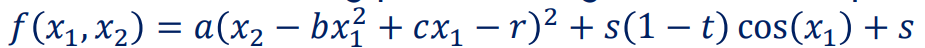
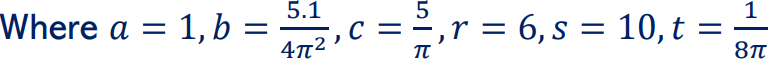

Define the function f(x1,x2):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

# Mendefinisikan parameter-parameter yang diperlukan
a = 1
b = 5.1 / (4 * np.pi**2)
c = 5 / np.pi
r = 6
s = 10
t = 1 / (8 * np.pi)

# Mendefinisikan fungsi f(x1, x2)
def f(x1, x2):
    term1 = a * (x2 - b * x1**2 + c * x1 - r)**2
    term2 = s * (1 - t) * np.cos(x1)
    term3 = s
    return term1 + term2 + term3

# Mendefinisikan fungsi gradien dari f(x1, x2)
def gradient_f(x1, x2):
    df_dx1 = 2 * a * (x2 - b * x1**2 + c * x1 - r) * (-2 * b * x1 + c) - s * (1 - t) * np.sin(x1)
    df_dx2 = 2 * a * (x2 - b * x1**2 + c * x1 - r)
    return np.array([df_dx1, df_dx2])

# Implementasi metode Steepest Descent
def steepest_descent(start_point, learning_rate=0.01, max_iterations=10000, tolerance=1e-6, bounds=(-13, 13)):
    x = np.array(start_point, dtype=float)
    path = [x.copy()]

    for i in range(max_iterations):
        grad = gradient_f(x[0], x[1])
        x_new = x - learning_rate * grad

        # Mendefinisikan batasan untuk x1 dan x2
        x_new[0] = np.clip(x_new[0], bounds[0], bounds[1])
        x_new[1] = np.clip(x_new[1], bounds[0], bounds[1])

        if np.linalg.norm(x_new - x) < tolerance:
            break
        x = x_new
        path.append(x.copy())
    return x, f(x[0], x[1]), np.array(path)

# Mendefinisikan area pencarian dan jumlah titik awal acak
search_bounds = (-18, 20)
num_starts = 50
found_minima = []
minima_paths = []

print(f"Menjalankan steepest descent dari sebanyak {num_starts} titik awal acak dengan batas {search_bounds}...")

for i in range(num_starts):
    start_x1 = np.random.uniform(search_bounds[0], search_bounds[1])
    start_x2 = np.random.uniform(search_bounds[0], search_bounds[1])
    start_point = [start_x1, start_x2]

    min_point, min_value, path = steepest_descent(start_point)

    # Cek apakah titik minimum baru ditemukan
    is_new_minimum = True
    for existing_min_point, _ in found_minima:
        if np.linalg.norm(min_point - existing_min_point) < 1e-2:  # Toleransi untuk kesamaan titik
            is_new_minimum = False
            break
    if is_new_minimum:
        found_minima.append((min_point, min_value))
        minima_paths.append(path)

# Mengurutkan minima berdasarkan nilai fungsi
found_minima.sort(key=lambda x: x[1])

from tabulate import tabulate

# Data untuk tabel
table_data = [
    [f"Titik minimum ke {i+1}", f"({point[0]:.4f}, {point[1]:.4f})", f"{value:.4f}"]
    for i, (point, value) in enumerate(found_minima)
]

# Header tabel
headers = ["No", "Titik (x)", "Nilai f(x)", "Jumlah iterasi"]
# Tambahkan jumlah iterasi ke tabel
for i, (point, value) in enumerate(found_minima):
    iterations = len(minima_paths[i]) - 1  # Jumlah iterasi adalah panjang path - 1
    table_data[i].append(iterations)

# Cetak tabel dengan format grid dan rata tengah
print("\n" + " Hasil Titik Minimum  ".center(76, '='))
print(tabulate(table_data, headers=headers, tablefmt="grid", stralign="center"))

print(f"\nQ1: Dari eksperimen ini, {len(found_minima)} titik minimum ditemukan dalam rentang yang diberikan.")
print("Ditemukan beberapa titik minimum yang berbeda, namun akan fokus pada yang paling rendah.")

# Menentukan global minimum dari hasil yang ditemukan
if found_minima:
    global_min_point, global_min_value = found_minima[0]
    print(f"\nQ2: Global minimum ditemukan pada titik: x = ({global_min_point[0]:.4f}, {global_min_point[1]:.4f}) dengan nilai fungsi f(x) = {global_min_value:.4f}")
    # Verifikasi dengan hint
    hint_optimum = np.array([np.pi, 2.275])
    if np.linalg.norm(global_min_point - hint_optimum) < 0.1: # Toleransi untuk kesamaan titik
        print(f"Sesuai dengan hint point, salah satu global minimum ditemukan pada titik (pi, 2.275) yaitu x = ({hint_optimum[0]:.4f}, {hint_optimum[1]:.4f})")
else:
    print("\nTidak ada titik minimum yang ditemukan dalam rentang yang diberikan.")

Menjalankan steepest descent dari sebanyak 50 titik awal acak dengan batas (-18, 20)...

=========================== Hasil Titik Minimum  ===========================
+--------------------+--------------------+--------------+------------------+
|         No         |     Titik (x)      |   Nilai f(x) |   Jumlah iterasi |
+====================+====================+==============+==================+
| Titik minimum ke 1 |  (3.1416, 2.2749)  |       0.3979 |              707 |
+--------------------+--------------------+--------------+------------------+
| Titik minimum ke 2 |  (9.4248, 2.4751)  |       0.3979 |              688 |
+--------------------+--------------------+--------------+------------------+
| Titik minimum ke 3 | (-3.1416, 12.2749) |       0.3979 |             1263 |
+--------------------+--------------------+--------------+------------------+
| Titik minimum ke 4 | (13.0000, 7.1421)  |      18.7134 |              452 |
+--------------------+--------------------+-----------


Visualisasi hasil


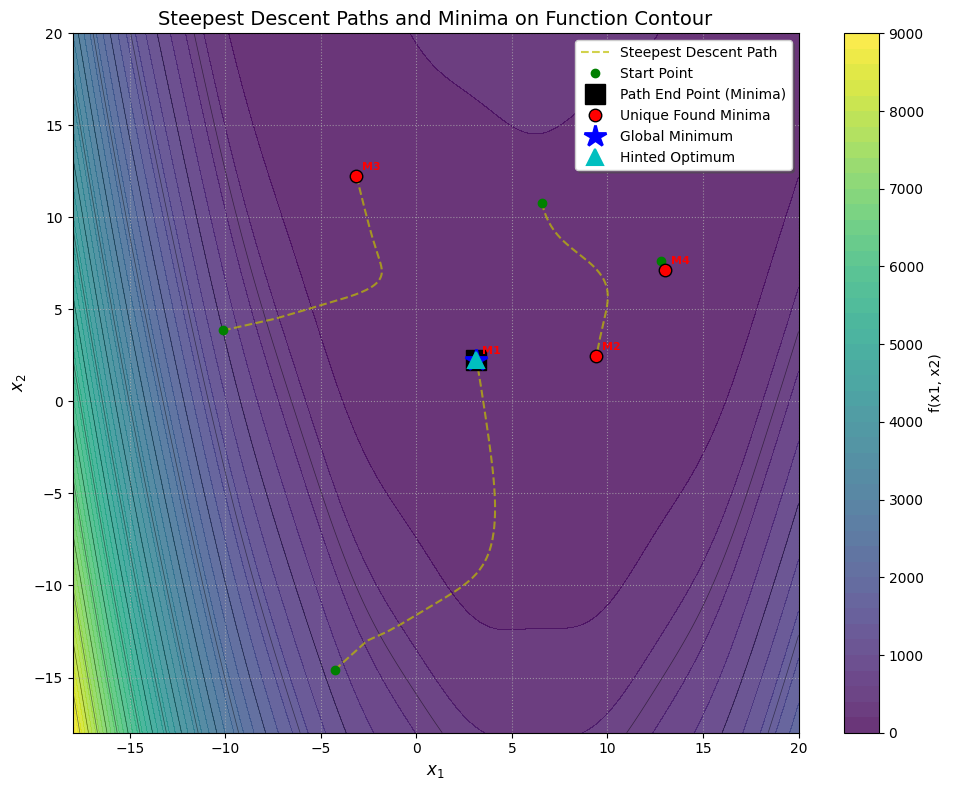

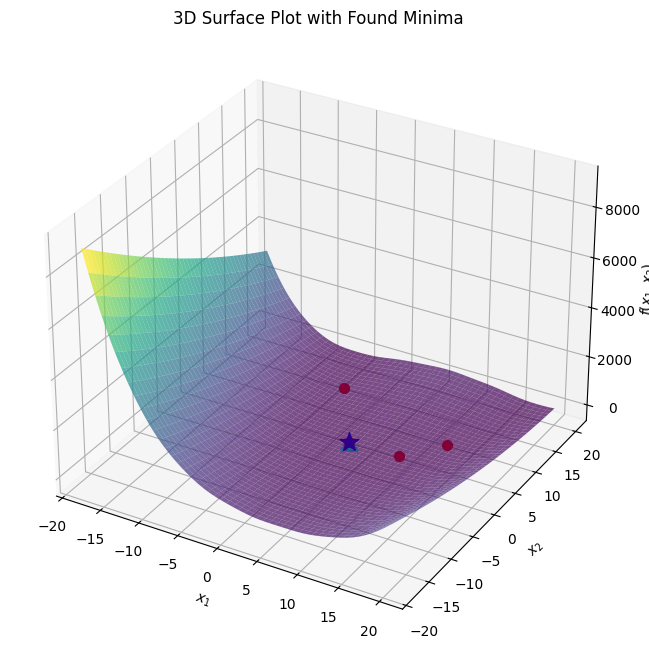

In [53]:
# Visualisasi hasil
print("\nVisualisasi hasil")

# Plot hasil countur dari fungsi
x1_vals = np.linspace(search_bounds[0], search_bounds[1], 800)
x2_vals = np.linspace(search_bounds[0], search_bounds[1], 800)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f(X1, X2)

plt.figure(figsize=(10, 8)) # Parameter untuk ukuran plot
contour_fill = plt.contourf(X1, X2, Z, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour_fill, label='f(x1, x2)')
plt.contour(X1, X2, Z, levels=20, colors='black', linewidths=0.5, alpha=0.5)

# Inisialisasi plot untuk label dan handle
plot_handles = []
plot_labels = []

# Inisalilasi variabel untuk menghindari duplikasi plot
path_plotted = False
start_point_plotted = False
end_point_plotted = False

for i, path in enumerate(minima_paths):
    # Plot titik untuk setiap jalur Steepest Descent
    if not path_plotted:
        line, = plt.plot(path[:, 0], path[:, 1], 'y--', linewidth=1.5, alpha=0.7, label='Steepest Descent Path')
        plot_handles.append(line)
        plot_labels.append('Steepest Descent Path')
        path_plotted = True
    else:
        plt.plot(path[:, 0], path[:, 1], 'y--', linewidth=1.5, alpha=0.7)

    # Plot titik awal untuk setiap jalur
    if not start_point_plotted:
        start_pt, = plt.plot(path[0, 0], path[0, 1], 'go', markersize=6, label='Start Point')
        plot_handles.append(start_pt)
        plot_labels.append('Start Point')
        start_point_plotted = True
    else:
        plt.plot(path[0, 0], path[0, 1], 'go', markersize=6)

    # Plot titik akhir untuk setiap jalur
    if not end_point_plotted:
        end_pt, = plt.plot(path[-1, 0], path[-1, 1], 'ks', markersize=14, label='Path End Point (Minima)')
        plot_handles.append(end_pt)
        plot_labels.append('Path End Point (Minima)')
        end_point_plotted = True
    else:
        plt.plot(path[-1, 0], path[-1, 1], 'ks', markersize=6)


# Plot minima yang ditemukan (dengan label unik untuk setiap titik)
found_min_plotted = False
for i, (min_point, _) in enumerate(found_minima):
    if not found_min_plotted:
        min_pt, = plt.plot(min_point[0], min_point[1], 'ro', markersize=9, markeredgecolor='black', label='Unique Found Minima')
        plot_handles.append(min_pt)
        plot_labels.append('Unique Found Minima')
        found_min_plotted = True
    else:
        plt.plot(min_point[0], min_point[1], 'ro', markersize=9, markeredgecolor='black')
    plt.text(min_point[0] + 0.3, min_point[1] + 0.3, f'M{i+1}', color='red', fontsize=8, weight='bold') # Memberikan label pada titik minima

# Plot golbal minimum
global_min_handle, = plt.plot(global_min_point[0], global_min_point[1], 'b*', markersize=16, markeredgewidth=2, label='Global Minimum') # Blue star
plot_handles.append(global_min_handle)
plot_labels.append('Global Minimum')

# Plot hinted optimum
hint_handle, = plt.plot(hint_optimum[0], hint_optimum[1], 'c^', markersize=12, markeredgewidth=1.5, label='Hinted Optimum') # Cyan triangle
plot_handles.append(hint_handle)
plot_labels.append('Hinted Optimum')

plt.title('Steepest Descent Paths and Minima on Function Contour', fontsize=14)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xlim(search_bounds[0], search_bounds[1])
plt.ylim(search_bounds[0], search_bounds[1])
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend(plot_handles, plot_labels, loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=10, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

# 3D plot surface of the function
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)

# Plot titik minima yang ditemukan
for min_point, min_value in found_minima:
    ax.scatter(min_point[0], min_point[1], min_value, color='red', s=50, label='Found Minima')

# Plot global minimum
ax.scatter(global_min_point[0], global_min_point[1], global_min_value, color='blue', marker='*', s=200, label='Global Minimum')

# Plot hinted optimum
ax.scatter(hint_optimum[0], hint_optimum[1], f(hint_optimum[0], hint_optimum[1]), color='cyan', marker='^', s=150, label='Hinted Optimum')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('3D Surface Plot with Found Minima')
plt.show()